In [30]:
import numpy as np
import matplotlib.pyplot as plt

import os
import opendatasets as od

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
from CustomDataset import CustomImgDataset

import matplotlib.pyplot as plt


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [5]:
#od.download("https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading covid19-xray-dataset-train-test-sets.zip to .\covid19-xray-dataset-train-test-sets


100%|██████████| 84.3M/84.3M [00:13<00:00, 6.48MB/s]


create ds and dl

In [52]:
train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

In [17]:
# preparing the folders 

In [53]:
root_path_train= 'G:/py-py-py-pytorch/Projects/COVID-XRAY/data/train'
root_path_test= 'G:/py-py-py-pytorch/Projects/COVID-XRAY/data/test'

In [54]:
train_dataset = CustomImgDataset(root=root_path_train,transforms=train_transforms)
test_dataset = CustomImgDataset(root=root_path_test,transforms=test_transforms)


In [69]:
print(train_dataset.CLASS_FOLDERS)

['NORMAL', 'PNEUMONIA']


visualize

torch.Size([1, 128, 128])


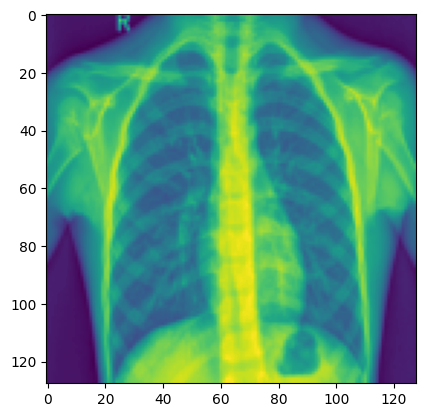

In [55]:
it = iter(train_dataset)
sample_img_tensor = next(it)[0]
print(sample_img_tensor.shape)
plt.imshow(sample_img_tensor.squeeze())

In [56]:
train_dataloader = DataLoader(train_dataset,batch_size=16,shuffle=True)

In [57]:
loader_it = iter(train_dataloader)
sample_batch = next(loader_it)
sample_batch

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0627, 0.0471, 0.0353,  ..., 0.0118, 0.0118, 0.0118],
           [0.0549, 0.0392, 0.0314,  ..., 0.0471, 0.0314, 0.0196],
           [0.0431, 0.0353, 0.0392,  ..., 0.1020, 0.0941, 0.0784],
           ...,
           [0.2745, 0.3333, 0.3412,  ..., 0.0118, 0.0353, 0.0784],
           [0.2941, 0.3451, 0.3569,  ..., 0.0118, 0.0353, 0.0706],
           [0.2980, 0.3373, 0.3647,  ..., 0.0118, 0.0314, 0.0667]]],
 
 
         [[[0.7412, 0.7412, 0.7412,  ..., 0.4667, 0.4627, 0.4824],
           [0.6980, 0.6980, 0.6980,  ..., 0.2706, 0.2667, 0.2941],
           [0.6980

In [58]:
sample_features,sample_label = sample_batch

In [92]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(32,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            
            nn.Flatten(),
            
            nn.Linear(4096,128),
            nn.ReLU(),

            nn.Linear(128,2)
        )
    
    def forward(self,inputs):
        out = self.network(inputs)
        return torch.softmax(out,dim=-1)
        


In [93]:
covid_model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss()
optimizier = torch.optim.Adam(covid_model.parameters(),lr=3e-4)

Training the model

In [94]:
num_epochs = 100
losses = []
def fit_model(num_epochs):
    for epoch in range(num_epochs):
        print("Epoch {}".format({epoch+1}))
        curr_loss = []
        for idx,batch in enumerate(iter(train_dataloader)):
            x,y = batch

            covid_model.train()
            pred = covid_model(x.to(device))
            loss = loss_function(pred.to(device),y.to(device))
            
            loss.backward()

            optimizier.step()
            optimizier.zero_grad()

            curr_loss.append(loss)
        
        mean_epoch_loss = torch.tensor(curr_loss).mean()
        losses.append(mean_epoch_loss)
        print("Loss = {}".format(mean_epoch_loss))


In [95]:
fit_model(100)

Epoch {1}
Loss = 0.715501070022583
Epoch {2}
Loss = 0.6769186854362488
Epoch {3}
Loss = 0.6484714150428772
Epoch {4}
Loss = 0.6149824857711792
Epoch {5}
Loss = 0.6327975392341614
Epoch {6}
Loss = 0.5626707673072815
Epoch {7}
Loss = 0.48273390531539917
Epoch {8}
Loss = 0.393915057182312
Epoch {9}
Loss = 0.3832741379737854
Epoch {10}
Loss = 0.371296763420105
Epoch {11}
Loss = 0.35286661982536316
Epoch {12}
Loss = 0.3455889821052551
Epoch {13}
Loss = 0.3443508744239807
Epoch {14}
Loss = 0.3742331564426422
Epoch {15}
Loss = 0.3508087396621704
Epoch {16}
Loss = 0.33864855766296387
Epoch {17}
Loss = 0.3362369239330292
Epoch {18}
Loss = 0.3670406937599182
Epoch {19}
Loss = 0.33620142936706543
Epoch {20}
Loss = 0.3338484764099121
Epoch {21}
Loss = 0.33136609196662903
Epoch {22}
Loss = 0.3339390754699707
Epoch {23}
Loss = 0.335233598947525
Epoch {24}
Loss = 0.33215034008026123
Epoch {25}
Loss = 0.3297279477119446
Epoch {26}
Loss = 0.33038079738616943
Epoch {27}
Loss = 0.3293163478374481
Epoch {

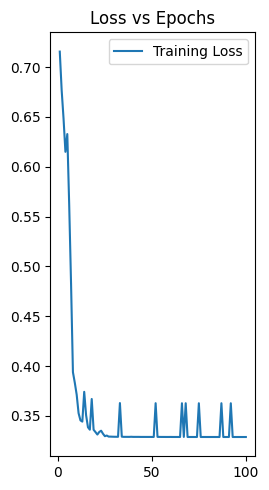

In [99]:
epoch = np.arange(num_epochs)+1
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.title("Loss vs Epochs")
plt.plot(epoch,losses,label="Training Loss")
plt.tight_layout()
plt.legend()
plt.show()